# Assignment 4 - Unsupervised Learning and Neural Networks

## *Abhishek Baral*
Netid: aa542


**Note to grader**: I exported the notebook as HTML, and converted the HTML output to a PDF file. As a result, there are some empty spaces in some pages (when a code block is not able to fit in the remaining space available in a page). Please ignore such spaceing; this is the best PDF output that I could get.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedforward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

## 1

### [35 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.

**(a)** Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation. 

**(b)** Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.

**(c)** Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.

**(d)** Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (c) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own*

**ANSWER**

-----

**(a)**

In [4]:
# import all required libraries
import seaborn as sns; sns.set()
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [24]:
class KMeans:
    
    
    def __init__(self, num_clusters, max_steps=100, convergence_threshold=0.05):
        
        self.num_clusters = num_clusters
        self.MAX_STEPS = max_steps
        self.CONVERGENCE_THRESHOLD = convergence_threshold
        pass
    
    def fit(self, X):
        
        self.X = X
        num_observations = self.X.shape[0]
        num_features = self.X.shape[1]
        
        self.means = self.X[np.random.randint(low=0, high=num_observations-1, size=self.num_clusters), :]     
        num_steps = 0
        
        while(num_steps <= self.MAX_STEPS):
            self.cluster_assignment = self.assign_points_to_clust(self.X, self.means)
            means_updated = self.update_clust()
        
            mean_movement = np.mean(means_updated, axis=1) - np.mean(self.means, axis=1)
            
            if(np.all(mean_movement < self.CONVERGENCE_THRESHOLD)):
                self.means = means_updated
                break
            else:
                self.means = means_updated
                pass
            
            num_steps += 1
            pass
        
        self.dissimilarity = self.get_sse()
        pass
      
        
    def get_sse(self):
       
        sse = 0
        
        for c in range(self.num_clusters):
            c_points = np.where(self.cluster_assignment == c)
            points   = self.X[c_points]
            
            for point in points:
                sse += self.get_distance(self.means[c], point)
                pass
            pass
        
        return sse
    
    def visualize_graph(self, title):
            
        mapping = self.cluster_assignment.reshape((-1, 1))
        
        for centroid in range(self.num_clusters):
            plt.scatter(self.X[np.where(mapping == centroid), 0], self.X[np.where(mapping == centroid), 1], label='cluster '+str(centroid+1), color=np.random.rand(3,))
            pass
        
        plt.scatter(self.means[:, 0], self.means[:, 1], color=np.random.rand(3,), label='centroid', marker = "X")
        plt.legend()
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title(title)
        pass
    
    def assign_points_to_clust(self, X, means):
       
        cluster_assignment = [0 for i in range(X.shape[0])]

        for i, point in enumerate(X):
            point_to_centroid_distances = []
            for centroid in means:
                
                point_to_centroid_distances.append(self.get_distance(centroid, point))
                pass
            
            cluster_assignment[i] = np.argmin(point_to_centroid_distances)
            pass

        return np.array(cluster_assignment)

    def update_clust(self):
        num_observations = self.X[0]
        means_updated = np.zeros((self.means.shape[0], self.means.shape[1]))
        for c in range(self.means.shape[0]):
            c_points = np.where(self.cluster_assignment == c)
            
            if(self.X[c_points].shape[0] == 0):
        
                return self.X[np.random.randint(low=0, high=num_observations-1, size=self.num_clusters), :]
                pass
            else:
        
                means_updated[c] = np.apply_along_axis(np.mean, 0, self.X[c_points])
            pass

        return means_updated

    def get_distance(self, a, b):

        a = np.array(a)
        b = np.array(b)
        return np.sqrt(np.sum(np.power((a - b), 2)))
    
    pass
# collabed with Aman

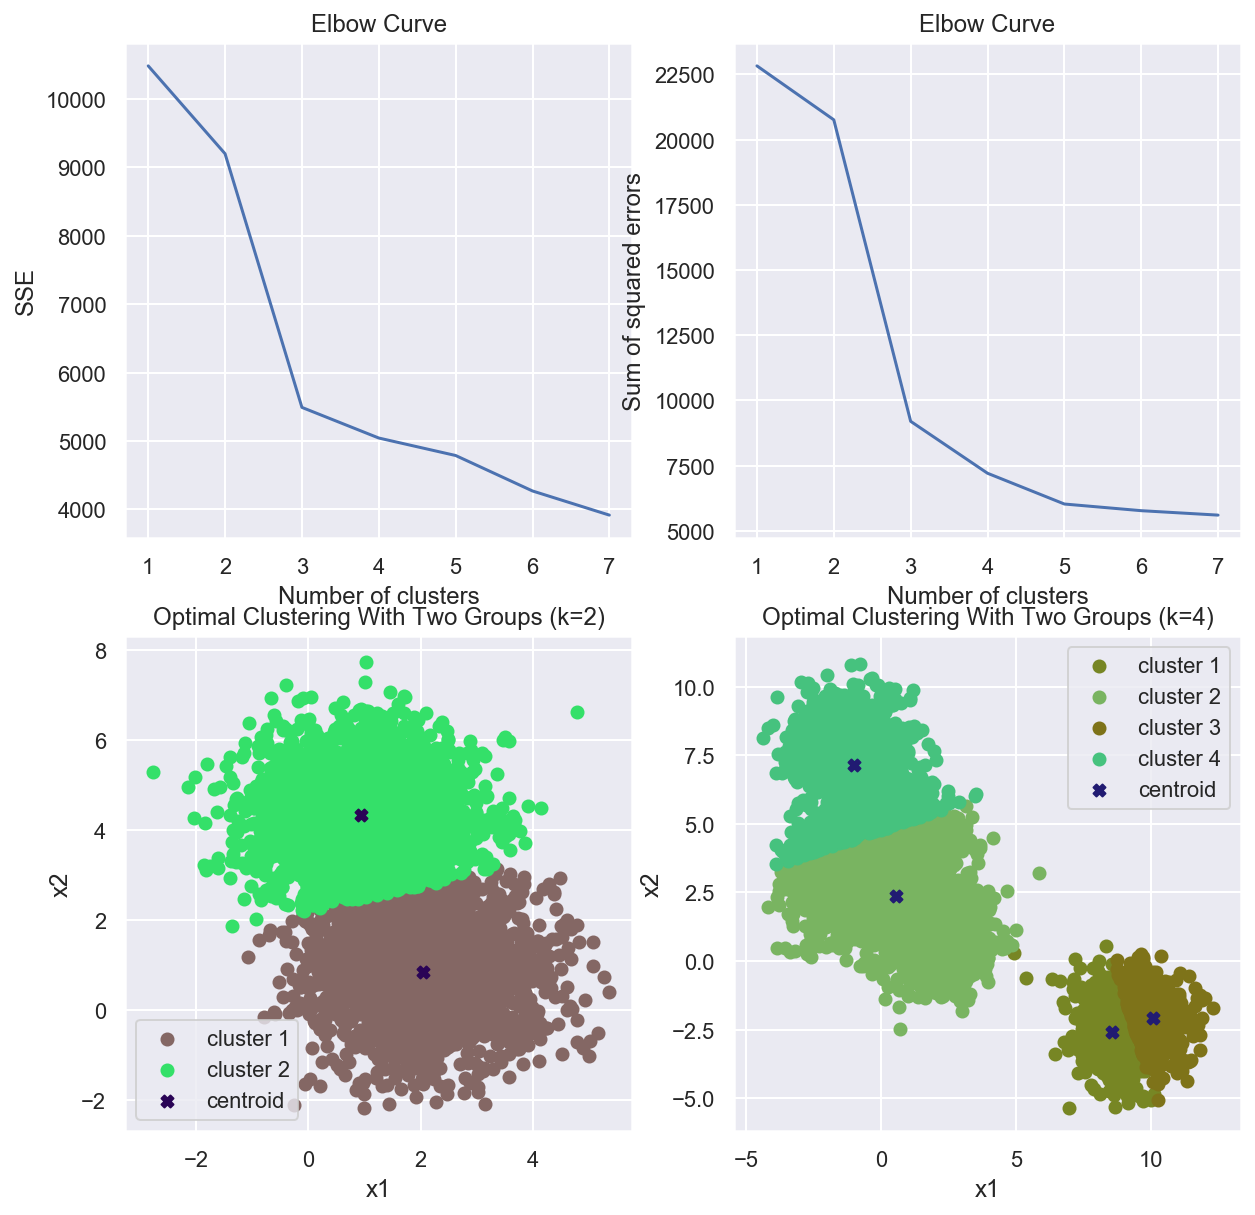

In [26]:

num_samples  = 5000
num_features = 2
num_blobs = 2
random_seed  = 0
X, y = datasets.make_blobs(n_samples=num_samples, n_features=num_features, centers=num_blobs, random_state=random_seed)

k_range = range(1, 8)
sse = []
for k in k_range:
    model = KMeans(num_clusters=k)
    model.fit(X)
    sse.append(model.dissimilarity)
    pass

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(k_range, sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Curve")

k = 2
model = KMeans(num_clusters=k)
model.fit(X)
plt.subplot(2, 2, 3)
model.visualize_graph(title='Optimal Clustering With Two Groups (k={})'.format(k))









num_samples  = 5000
num_features = 2
num_blobs    = 5
random_seed  = 0
X, y = datasets.make_blobs(n_samples=num_samples, n_features=num_features, centers=num_blobs, random_state=random_seed)

k_range = range(1, 8)
sse = []
for k in k_range:
    model = KMeans(num_clusters=k)
    model.fit(X)
    sse.append(model.dissimilarity)
    pass

plt.subplot(2, 2, 2)
plt.plot(k_range, sse)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared errors")
plt.title("Elbow Curve")

k = 4
model = KMeans(num_clusters=k)
model.fit(X)
plt.subplot(2, 2, 4)
model.visualize_graph(title='Optimal Clustering With Two Groups (k={})'.format(k))

# collabed with aman

**(b)**

For the first graph we see that when k = 2 there is a large drop in SSE compared to the other higher values of k, because of this, k = 2 was selected

For the second graph, we see that this graph was smoother on the elbow graph, but when we exceed k=4, it seems that the returns on SSE are diminishing. So k=4 was chosen.

**(c)**

1. K-means: Aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster

2. Agglomerative clustering: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

3. Gaussian mixture models: Are a probabilistic model for representing normally distributed subpopulations within an overall population. Mixture models in general don't require knowing which subpopulation a data point belongs to, allowing the model to learn the subpopulations automatically by maximizing the likelihood using an statistical technique such as expectation maximization.

4. DBSCAN:  It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions

5. Spectral clustering: the approach is used to identify communities of nodes in a graph based on the edges connecting them. The method is flexible and allows us to cluster non graph data as well

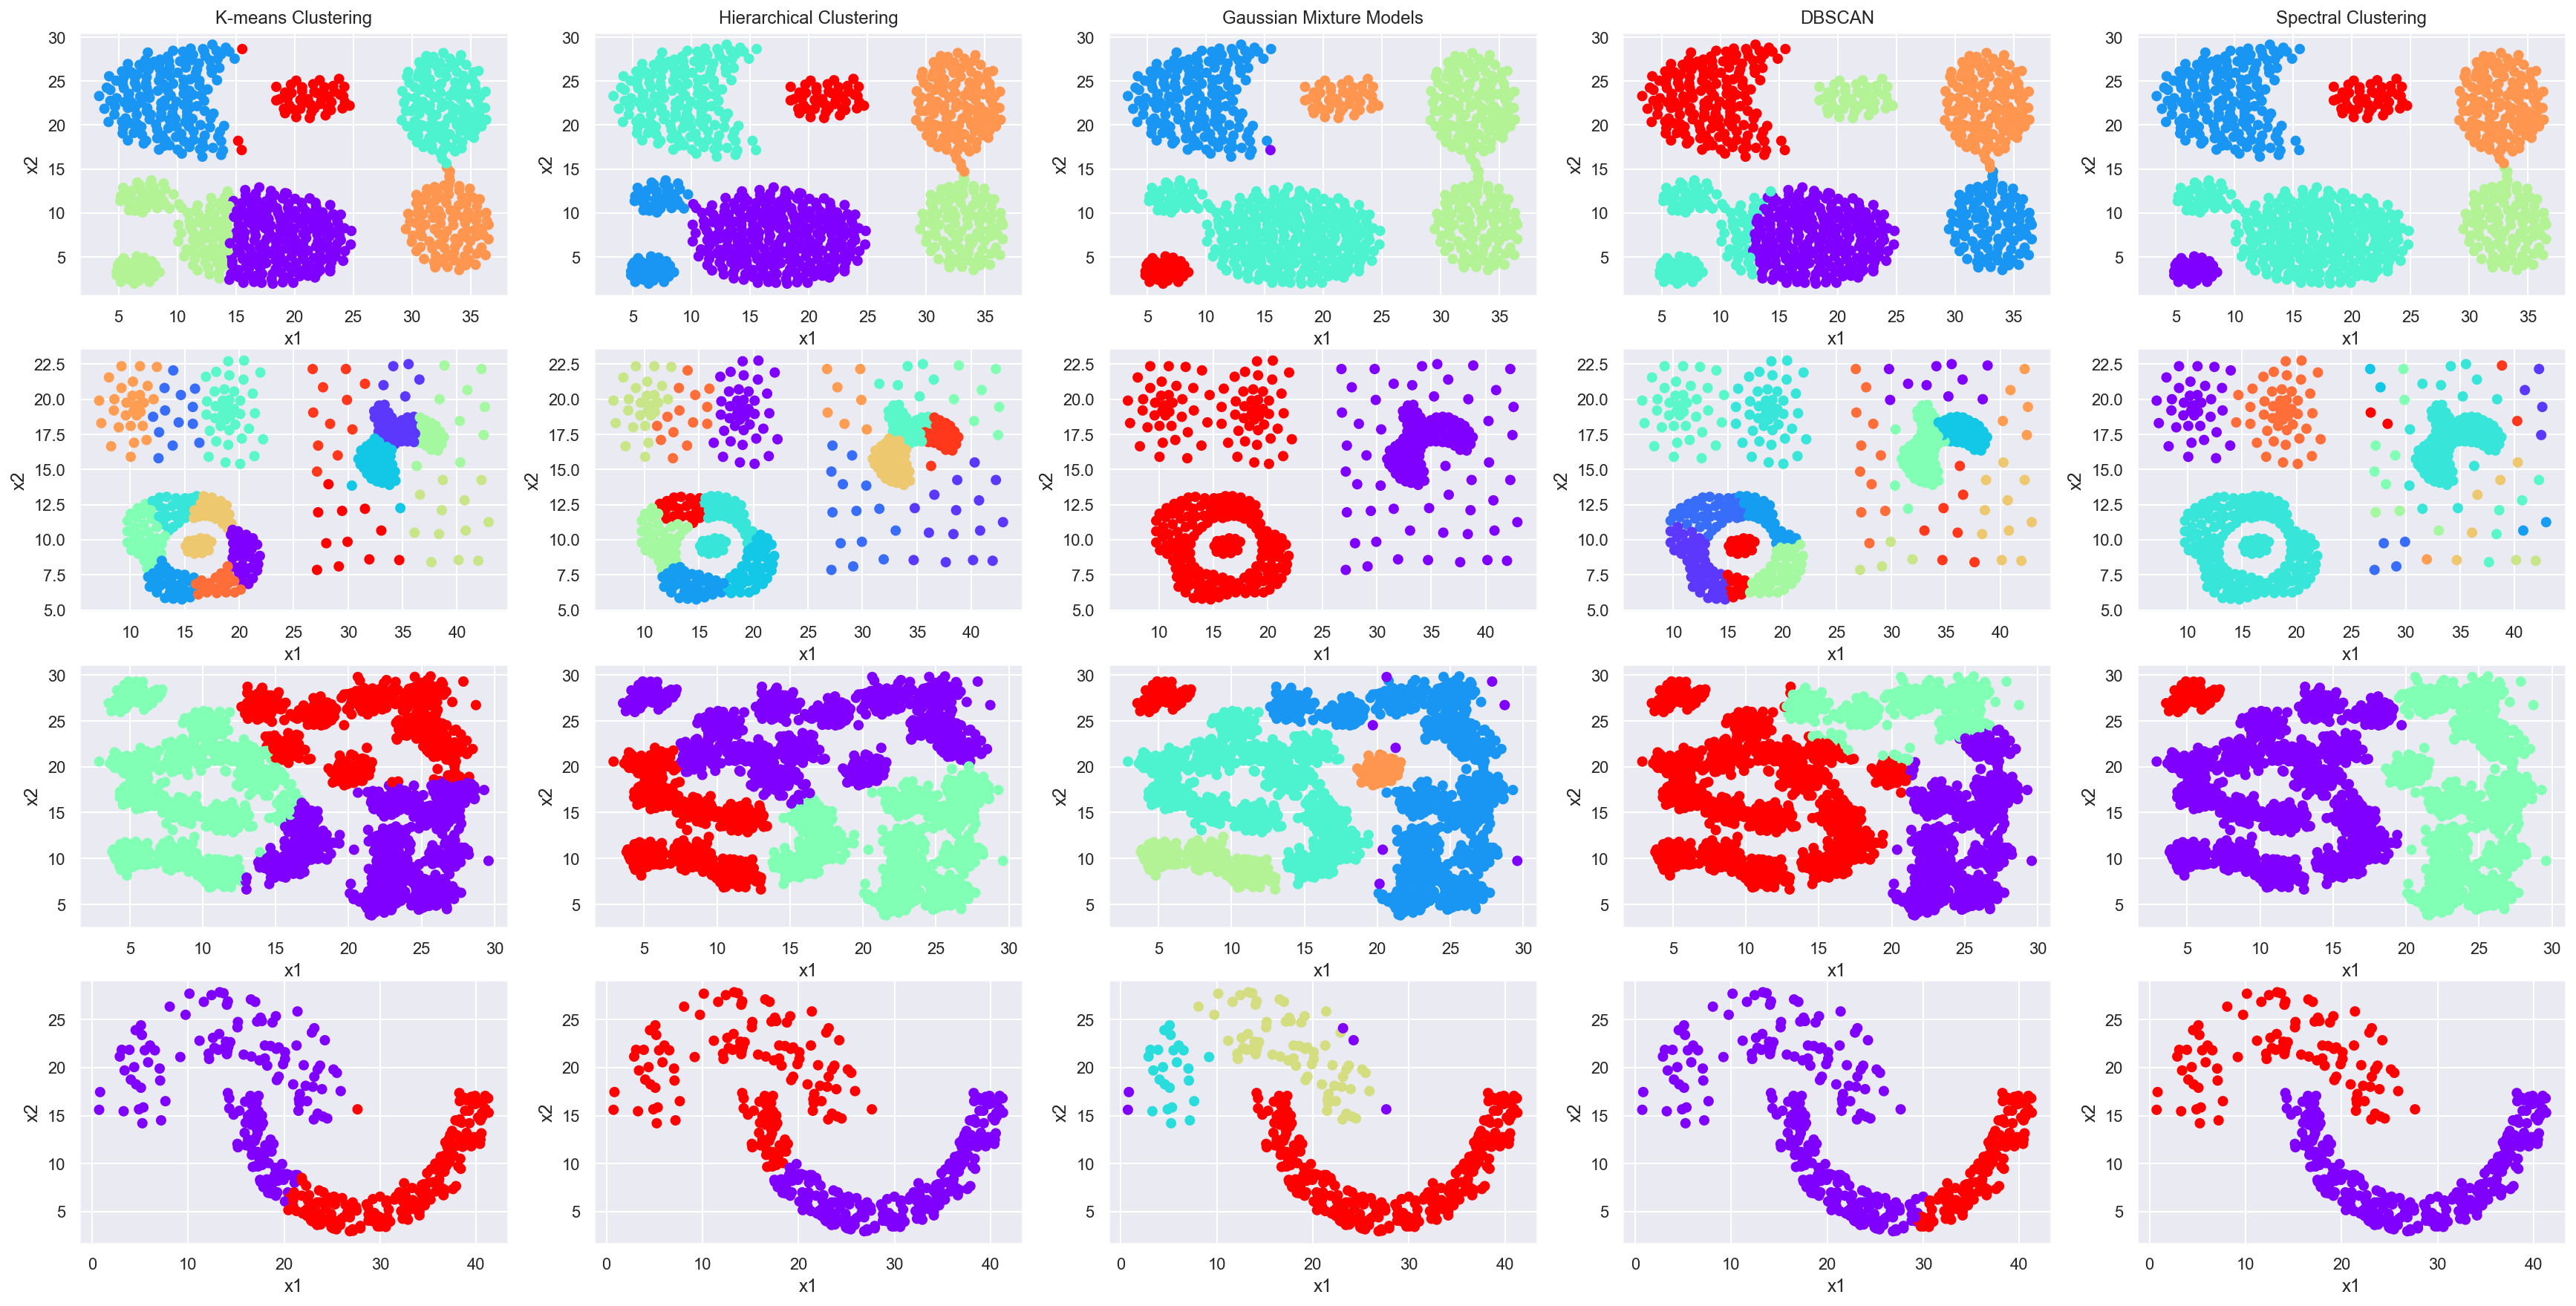

In [12]:
aggregation = pd.read_csv('Aggregation.txt', header=None, sep='\t', usecols=[0, 1]).values
compound = pd.read_csv('Compound.txt', header=None, sep='\t', usecols=[0, 1]).values
d31 = pd.read_csv('D31.txt', header=None, sep='\t', usecols=[0, 1]).values
jain = pd.read_csv('jain.txt', header=None, sep='\t', usecols=[0, 1]).values


def plot_output(data, labels, title=''):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap = 'rainbow')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    pass


data_names = [aggregation, compound, d31, jain]

algo = [cluster.KMeans(n_clusters=6),
           cluster.AgglomerativeClustering(n_clusters=6),
           cluster.DBSCAN(eps=1.5),
           mixture.GaussianMixture(n_components=6),
           cluster.SpectralClustering(n_clusters=6),
          
           cluster.KMeans(n_clusters=15),
           cluster.AgglomerativeClustering(n_clusters=15),
           cluster.DBSCAN(eps=3),
           mixture.GaussianMixture(n_components=15),
           cluster.SpectralClustering(n_clusters=15),
           
           cluster.KMeans(n_clusters=3),
           cluster.AgglomerativeClustering(n_clusters=3),
           cluster.DBSCAN(eps=1),
           mixture.GaussianMixture(n_components=3),
           cluster.SpectralClustering(n_clusters=3),
          
           cluster.KMeans(n_clusters=2),
           cluster.AgglomerativeClustering(n_clusters=2),
           cluster.DBSCAN(eps=2.5),
           mixture.GaussianMixture(n_components=2),
           cluster.SpectralClustering(n_clusters=2)] # collabed with aman to find optimal values

algo_names = ['K-means Clustering', 'Hierarchical Clustering', 'Gaussian Mixture Models', 'DBSCAN','Spectral Clustering']

plt.figure(figsize=(30, 15))
n_plot = 1
for i, method in enumerate(algo):
    data_index = i//5
    algo_index = i % 5
    labels = method.fit_predict(data[data_index])
    plt.subplot(4, 5, n_plot)
    if(n_plot <= 5):
        plot_output(data_names[data_index], labels, title=algo_names[algo_index])
    else:
        plot_output(data_names[data_index], labels)
    n_plot += 1
    pass

**(d)**

1. Aggrgation data: Specteral and Hierarchical did the best, but the rest did not perform well since the data was "gaussian distributed"

2. D31 data: This data was quite challanging as there are no obvious groups, so there is no real winner but DBSCAN did perform the worst

3. Compound data: In this dataset, DBSCAN actually performs well while the other datasets perform poorly

4. Jain data Specteral clustering performs well since the data is "connected"

## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*


**(a)**

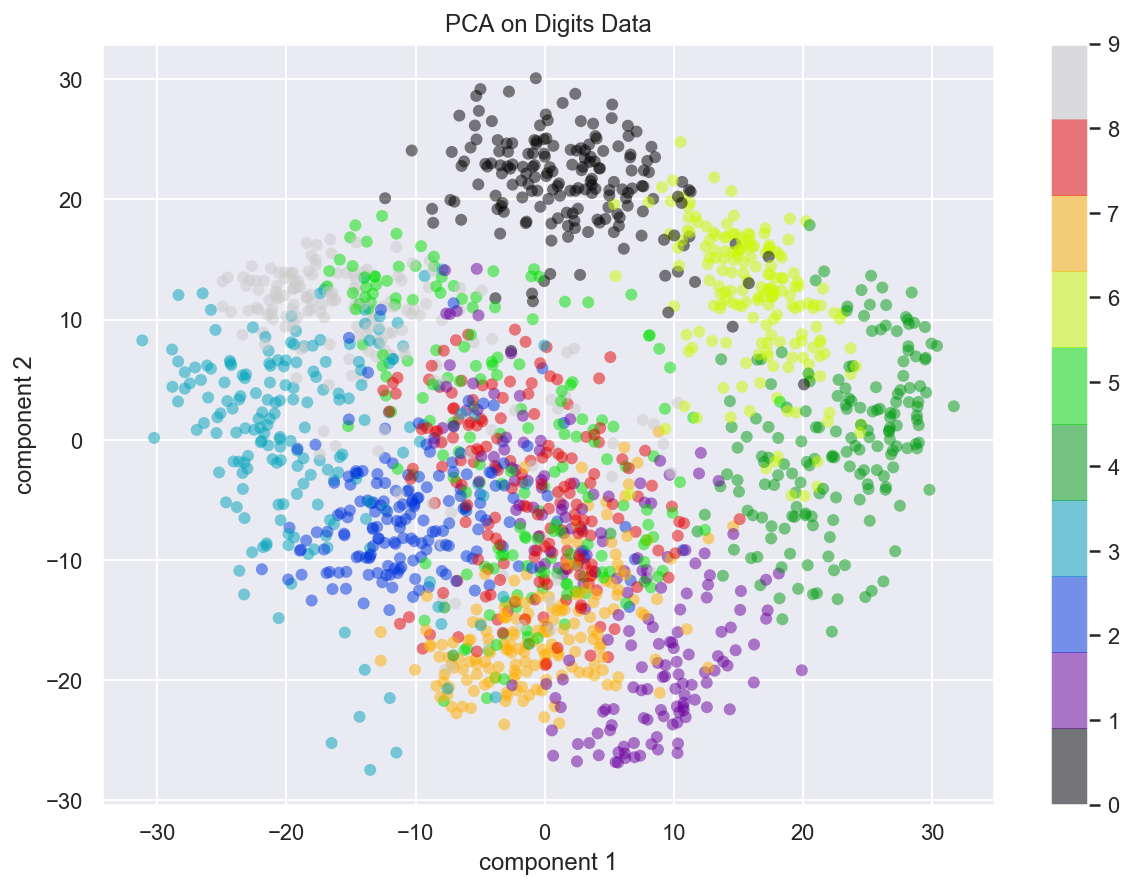

In [16]:
digits = load_digits()

pca = PCA(2) 
projected = pca.fit_transform(digits.data)

# make scatterplot
plt.figure(figsize=(10, 7))
plt.scatter(projected[:, 0], 
            projected[:, 1],
            c=digits.target, 
            edgecolor='none', 
            alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('PCA on Digits Data')
plt.colorbar()

**(b)**

Variance unexplained by the first two components = 71.49%


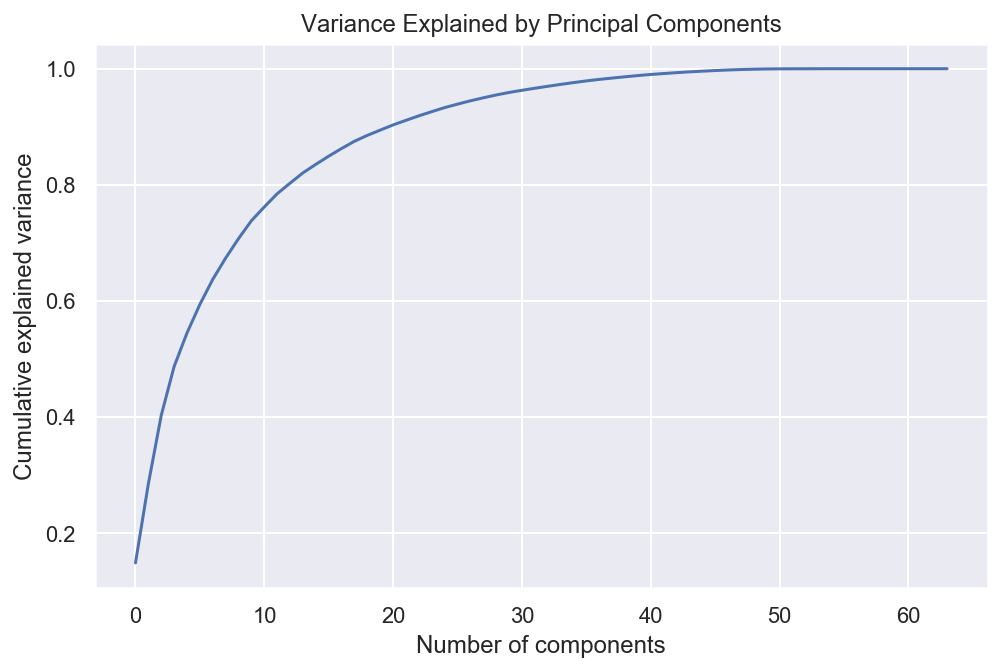

In [19]:
pca = PCA().fit(digits.data)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Variance Explained by Principal Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

print('Variance unexplained by the first two components = {:.2f}%'.format(100*(1 - pca.explained_variance_ratio_[:2].sum())))

**(c)**

Text(0, 0.5, 'component 2')

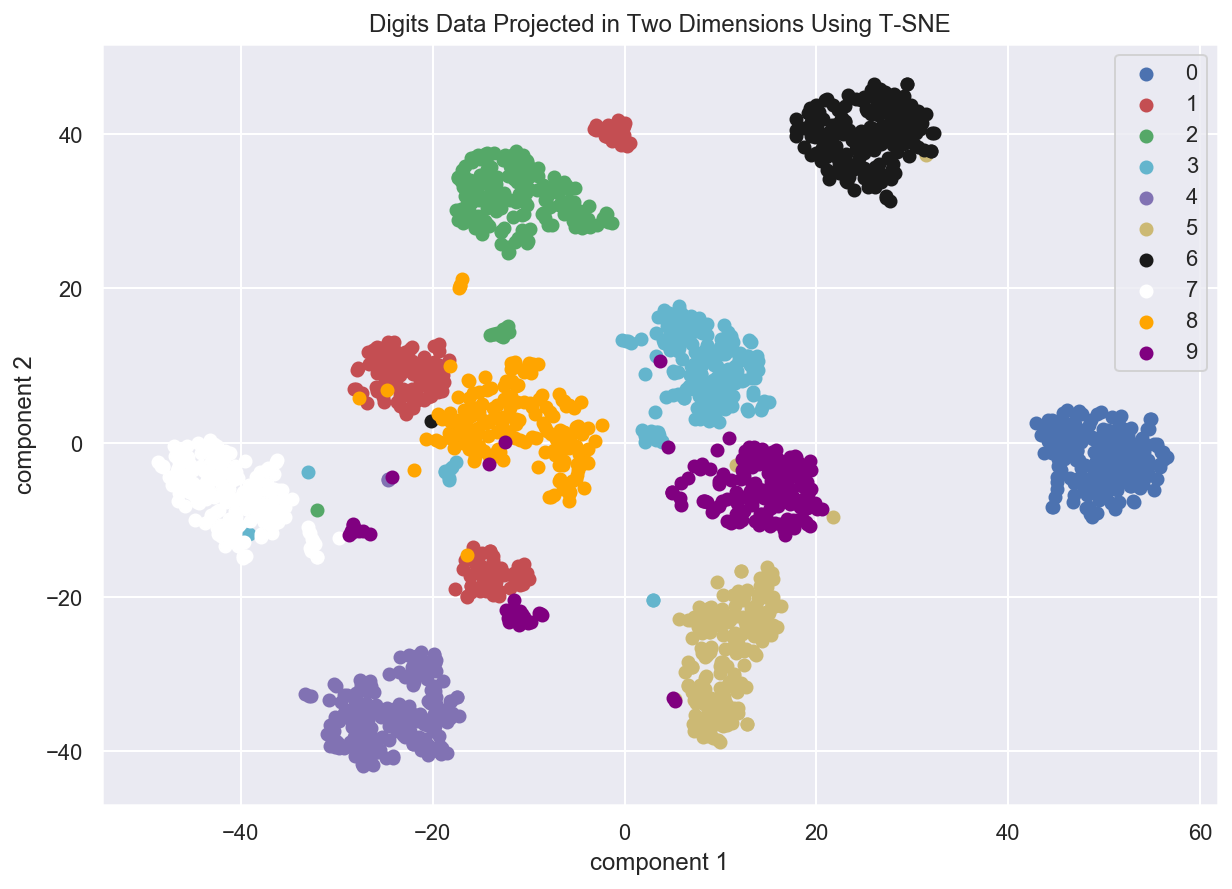

In [13]:
digits = load_digits()
X = digits.data
y = digits.target

tsne = TSNE(n_components=2, perplexity=50, random_state=0)
X_2D = tsne.fit_transform(X)

plt.figure(figsize=(10, 7))
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']
for color, label in zip(colors, digits.target_names):
    plt.scatter(X_2D[y == label, 0], X_2D[y == label, 1], c=color, label=label)
    pass

plt.legend()
plt.title('Digits Data Projected in Two Dimensions Using T-SNE')
plt.xlabel('component 1')
plt.ylabel('component 2')

**(d)**

Comparing the two methods, we see that t-SNE performs better as the clustering of numbers is more spread out, compared to PCA where there is considerable overlap.

The reason why t-SNE is better is that it creates seperate identifiable clusters, where PCA's purpose is to decompose the data into principle components.  

## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

**(c)** Suggest two ways in which you neural network implementation could be improved.

**ANSWER**

-----
**(a)**

In [6]:
class myNeuralNetwork(object):
    def __init__(self, n_in, n_layer1, n_layer2, n_out, learning_rate=0.1):
        
        self.n_in = n_in
        self.n_layer1 = n_layer1
        self.n_layer2 = n_layer2
        self.n_out = n_out
        self.learning_rate = learning_rate
        
        self.w1 = np.random.randn(self.n_layer1, self.n_in)
        self.w2 = np.random.randn(self.n_layer2, self.n_layer1)
        self.w3 = np.random.randn(self.n_out, self.n_layer2)
        pass
    
    
    def forward_propagation(self, x):
        
        self.x = x.reshape(-1, 1)
        
        self.z1 = self.w1 @ self.x
        self.a1 = self.sigmoid(self.z1)
        
        self.z2 = self.w2 @ self.a1
        self.a2 = self.sigmoid(self.z2)
        
        self.z3 = self.w3 @ self.a2
        self.a3 = self.sigmoid(self.z3)
        
        y_hat = self.a3
        
        return y_hat
    
    
    def compute_loss(self, X, y):
        
        errors = (y - self.predict_proba(X))**2
        mean_error = errors.mean()
        return mean_error
    
    
    def backpropagate(self, x, y):
        
        x = x.reshape(-1, 1)
        y = y.reshape(-1, 1)
        
        y_hat = self.forward_propagation(x)
        
        
        self.dE_dw3 = (y_hat - y) * (self.sigmoid(self.z3)) * (1 - self.sigmoid(self.z3)) @ (self.a2.T)
        self.dE_dw2 = ((self.w3.T @ ((y_hat - y) * (self.sigmoid(self.z3)) * (1 - self.sigmoid(self.z3)))) * ((self.sigmoid(self.z2)) * (1 - self.sigmoid(self.z2)))) @ self.a1.T
        self.dE_dw1 = ((self.w2.T @ (((self.w3.T @ ((y_hat - y) * (self.sigmoid(self.z3)) * (1 - self.sigmoid(self.z3)))) * ((self.sigmoid(self.z2)) * (1 - self.sigmoid(self.z2)))))) * ((self.sigmoid(self.z1)) * (1 - self.sigmoid(self.z1)))) @ self.x.T
        
        pass
    
    
    def stochastic_gradient_descent_step(self):
                
        self.w3 -= self.learning_rate * self.dE_dw3
        self.w2 -= self.learning_rate * self.dE_dw2
        self.w1 -= self.learning_rate * self.dE_dw1
        
        pass
    
    
    def fit(self, X, y, max_epochs=100, get_validation_loss=False, verbose=False):
    
        n_samples = X.shape[0]
        train_losses = []
        val_losses = []
        
        for epoch in range(max_epochs):
            
            shuffled_indices = np.random.choice(np.arange(X.shape[0]), size = X.shape[0], replace=False)
            X = X[shuffled_indices]
            y = y[shuffled_indices]
            
            
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
            
            
            for sample in range(X_train.shape[0]):                
               
                self.forward_propagation(X_train[sample])
                self.backpropagate(X_train[sample], y_train[sample])
                self.stochastic_gradient_descent_step()
                pass
            
            
            train_losses.append(self.compute_loss(X_train, y_train))
            val_losses.append(self.compute_loss(X_val, y_val))
        
        
        if(get_validation_loss):
            return train_losses, val_losses
        else:
            return train_losses
    
    
    def predict_proba(self, X):
        
        z1 = self.w1 @ X.T
        a1 = self.sigmoid(z1)
        
        z2 = self.w2 @ a1
        a2 = self.sigmoid(z2)
        
        z3 = self.w3 @ a2
        y_hat = self.sigmoid(z3)
                
        return y_hat.flatten()
    
    
    def predict(self, X, decision_thresh=0.5):
        
        
        y_hat = self.predict_proba(X)
        
        
        y_hat[y_hat > decision_thresh]  = 1
        y_hat[y_hat <= decision_thresh] = 0
        
        return y_hat.flatten()
    
    
    def sigmoid(self, X):
        
        X_sigmoid = 1 / (1 + np.exp(-X))
        return X_sigmoid
    
    
    def sigmoid_derivative(self, X):
        
        return self.sigmoid(X) * (1 - self.sigmoid(X))

**(b)**

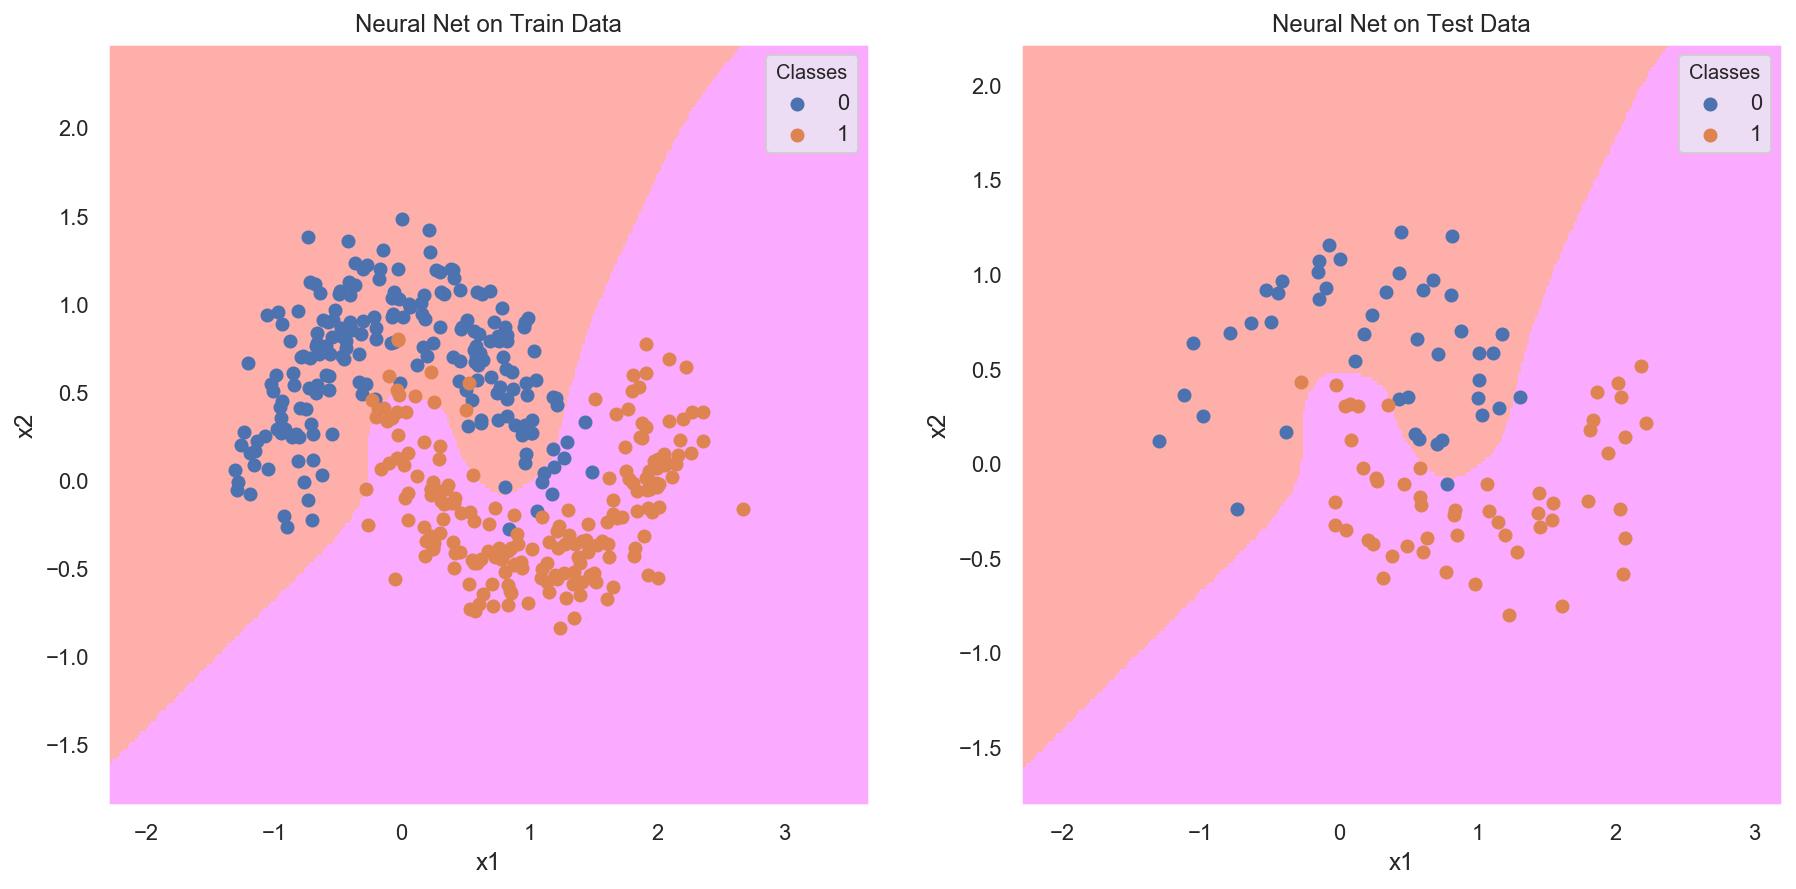

In [7]:

N_train = 500
X, y = make_moons(n_samples=N_train, noise=0.20)

N_test  = 100
X_test, y_test = make_moons(n_samples=N_test, noise=0.20)

num_epochs = 500
lr = 1
n_in = X.shape[1]
n_hidden_1 = 5
n_hidden_2 = 5
n_out = 1
nn = myNeuralNetwork(n_in=n_in, n_layer1=n_hidden_1, n_layer2=n_hidden_2, n_out=n_out, learning_rate=lr)

train_loss, val_loss = nn.fit(X, y, max_epochs=num_epochs, get_validation_loss=True)

y_hat_nn = nn.predict_proba(X_test)


def nn_plot(X, y, model):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    
    fig, (ax_train, ax_test) = plt.subplots(nrows=1, ncols=2)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    
    x_min_train, x_max_train = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min_train, y_max_train = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    x_min_test, x_max_test = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min_test, y_max_test = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    
    step = 0.02
    xx_train, yy_train = np.meshgrid(np.arange(x_min_train, x_max_train, step), np.arange(y_min_train, y_max_train, step))
    Z_train = np.array(model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])).reshape(xx_train.shape)
    
    xx_test, yy_test = np.meshgrid(np.arange(x_min_test, x_max_test, step), np.arange(y_min_test, y_max_test, step))
    Z_test = np.array(model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])).reshape(xx_test.shape)

    cmap_light = ListedColormap(['#FFAFAA', '#AAFFAA', '#FAAAFF'])
    ax_train.pcolormesh(xx_train, yy_train, Z_train, cmap=cmap_light)
    ax_test.pcolormesh(xx_test, yy_test, Z_test, cmap=cmap_light)
    
    ax_train.scatter(X_train[np.where(y_train==0), 0], X_train[np.where(y_train==0), 1], label="0")
    ax_train.scatter(X_train[np.where(y_train==1), 0], X_train[np.where(y_train==1), 1], label="1")
    legend = ax_train.legend(title="Classes")
    
    ax_test.scatter(X_test[np.where(y_test==0), 0], X_test[np.where(y_test==0), 1], label="0")
    ax_test.scatter(X_test[np.where(y_test==1), 0], X_test[np.where(y_test==1), 1], label="1")
    legend = ax_test.legend(title="Classes")
    
    ax_train.set_xlabel('x1')
    ax_train.set_ylabel('x2')
    ax_train.set_title('Neural Net on Train Data')
    ax_train.set_xlim(xx_train.min(), xx_train.max())
    ax_train.set_ylim(yy_train.min(), yy_train.max())
    
    ax_test.set_xlabel('x1')
    ax_test.set_ylabel('x2')
    ax_test.set_title('Neural Net on Test Data')
    ax_test.set_xlim(xx_test.min(), xx_test.max())
    ax_test.set_ylim(yy_test.min(), yy_test.max())
    
    pass
# graphing code found on google
nn_plot(X, y, nn)

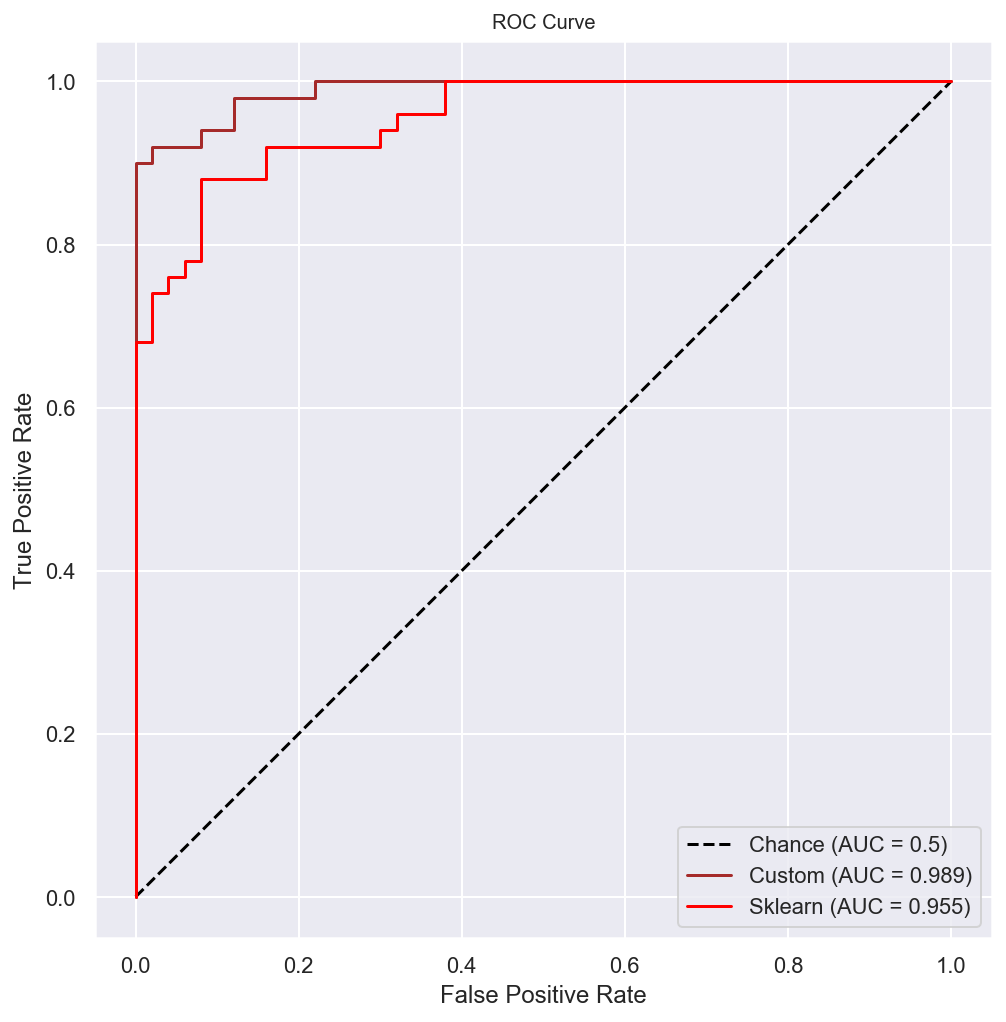

In [14]:
num_epochs = 500
lr = 1e-3
n_hidden_1 = 5
n_hidden_2 = 5


sk_nn = MLPClassifier(hidden_layer_sizes=(n_hidden_1, n_hidden_2), 
                    activation='logistic', 
                    solver='sgd', 
                    alpha=0.0, 
                    batch_size=1, 
                    learning_rate='constant', 
                    learning_rate_init=lr, 
                    max_iter=num_epochs, 
                    shuffle=True, 
                    random_state=4, 
                    verbose=False,
                    nesterovs_momentum=False, 
                    early_stopping=False, 
                    validation_fraction=0.2, 
                    n_iter_no_change=10)


sk_nn.fit(X, y)


y_hat_sk = sk_nn.predict_proba(X_test)[:, 1]


def plot_roc_curve(y_true, y_pred_1, y_pred_2):
    
    plt.figure(figsize=(7, 7))
    
   
    major_class = np.argmax(np.bincount(y))
    pred = [major_class for _ in range(len(y_true))]
    auc = metrics.roc_auc_score(y_true, pred)
    fpr, tpr, _ = metrics.roc_curve(y_true, pred)
    plt.plot(fpr, tpr, '--', color='black', label='Chance (AUC = {:.1f})'.format(auc))
    
   
    auc_1           = metrics.roc_auc_score(y_true, y_pred_1)
    fpr_1, tpr_1, _ = metrics.roc_curve(y_true, y_pred_1)
    plt.plot(fpr_1, tpr_1, color='brown', label='Custom (AUC = {:.3f})'.format(auc_1))
    
   
    auc_2 = metrics.roc_auc_score(y_true, y_pred_2)
    fpr_2, tpr_2, _ = metrics.roc_curve(y_true, y_pred_2)
    plt.plot(fpr_2, tpr_2, color='red', label='Sklearn (AUC = {:.3f})'.format(auc_2))
    
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()
    plt.title('ROC Curve', fontsize=10)
    pass
# graph code found on google

plot_roc_curve(y_test, y_hat_nn, y_hat_sk)

**(c)**

One thing I would add would be batch normalization as it improves the speed of the algorithm. Another feature I would add would be an adaptive learning rate, that would not be a hard coded number and can change from a large rate in the begining and get smaller as we reach the minima
